# Pandas pada Psicóloogos
![](https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png)

[pandas - Python Data Analysis Library](https://pandas.pydata.org/docs/)

# Numpy para Psicólogos
![](https://user-images.githubusercontent.com/50221806/85190325-2b3f4400-b26c-11ea-93f3-81a101614a88.png)

[Numerical Python](https://numpy.org/)

## Introducción a los DataSets

In [ ]:
import pandas as pd
import numpy as np
# librería "glob" — Busca nombres de archivos que coincidan con un patrón.
from glob import glob as gg
# Libería "tqdm" para ver el progreso del o de los procesos
from tqdm import tqdm
# Para que "tqdm" funcione
import time

## 1er Dataset. Datos Inventados

In [ ]:
# Búsqueda de las Bases
files_xlsx = gg('*.xlsx')
files_xlsx

In [ ]:
xlsx1 = pd.read_excel(files_xlsx[0])
xlsx1.head()
# ¿El ID lo queremos como índice?

In [ ]:
xlsx1 = pd.read_excel(files_xlsx[0], index_col='ID')
xlsx1.head()

In [ ]:
# Número de observaciones que tiene el dataset
xlsx1.shape #(filas, columnas)

In [ ]:
xlsx1.shape[0] #quiero solo las filas

In [ ]:
xlsx1.shape[1] #quiero solo las columnas

In [ ]:
# Pero deseo toda la información
xlsx1.info() #¿Cómo interpretar esta información?

In [ ]:
# Quiero saber solo las filas
xlsx1.index

In [ ]:
# Quiero solo saber los nombres de las columnas
xlsx1.columns

In [ ]:
print(xlsx1.Var1.unique())
print(' ')
print(list(xlsx1.Var1.unique()))

In [ ]:
# Quiero saber los valores que convierte la columna Var1 en objeto
objetos = [tipo for tipo in xlsx1.Var1.unique() if type(tipo) == str]
objetos

In [ ]:
objetos = []
for tipo in xlsx1.Var1.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

In [ ]:
objetos = [tipo for tipo in xlsx1.Var5.unique() if type(tipo) == str]
objetos

In [ ]:
objetos = []
for tipo in xlsx1.Var5.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

In [ ]:
# Hacerlo por cada uno toma mucho recurso de tiempo ¿Cómo mejoramos esto?
objetos = []
for columna in xlsx1.columns:
    print('En la columna {}'.format(columna))
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            print(tipo)
            print(' ')
            objetos.append(tipo)
            
objetos

In [ ]:
objetos = set(objetos)
objetos

In [ ]:
objetos = list(set(objetos))
objetos

In [ ]:
lista1 = objetos
lista2 = np.empty(len(lista1))
print(lista2)

In [ ]:
lista2[:] = np.nan
print(lista2)

In [ ]:
objetos3 = zip(lista1, lista2)
objetos4 = dict(objetos3)
objetos4

In [ ]:
# Como debe de verse
objetos = []
for columna in xlsx1.columns:
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            objetos.append(tipo)
            
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))
objetos

In [ ]:
xlsx1

In [ ]:
xlsx1 = xlsx1.replace(objetos)
xlsx1

## ¿Se acuerdan de las demás bases?

In [ ]:
print(files_xlsx)

### ¿Qué función aplicamos y cómo lo aplicamos para que haga todo de una buena vez?
#### ¿Se acuerdan del "Ciclo FOR"?

In [ ]:
print(files_xlsx[0])
print(pd.read_excel(files_xlsx[0], index_col='ID').head())
print(' ')
print(files_xlsx[1])
print(pd.read_excel(files_xlsx[1], index_col='ID').head())
print(' ')
print(files_xlsx[2])
print(pd.read_excel(files_xlsx[2], index_col='ID').head())

In [ ]:
for base in files_xlsx:
    print(base)

In [ ]:
for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    objetos = []
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)

    lista1 = list(set(objetos))
    lista2 = np.empty(len(lista1))
    lista2[:] = np.nan
    objetos = dict(zip(lista1, lista2))
    time.sleep(0.01)

In [ ]:
# ¿Son todos los objetos de todas las bases?
objetos

In [ ]:
# ¿Porqué está dando solo el archivo "Ejemplo3.xlsx?"
# ¿Y los demás?
xlsx

In [ ]:
xlsx.replace(objetos)

## Vamonos despacito

In [ ]:
## Este script solo es para obtener los objetos

objetos = [] # Para los objetos que no nos sirve

for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    #objetos = []
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)
    time.sleep(0.01)

In [ ]:
# Aquí hacemos nuestro diccionario de objetos a quitar
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))

In [ ]:
objetos

In [ ]:
## Concatenando bases
x1 = pd.read_excel(files_xlsx[0], index_col='ID')
print(x1.axes)
print(x1.shape)
print(' ')
x2 = pd.read_excel(files_xlsx[1], index_col='ID')
print(x2.axes)
print(x2.shape)
print(' ')
x3 = pd.read_excel(files_xlsx[2], index_col='ID')
print(x3.axes)
print(x3.shape)

In [ ]:
xlsx = pd.concat([x1, x2, x3])
xlsx
## ¿Qué pasó aquí?

In [ ]:
xlsx = pd.concat([x1, x2, x3], axis=1)
xlsx
## ¿Por qué se tiene que colocar el argumento de "axis=1"?

In [ ]:
xlsx.columns

In [ ]:
xlsx.info()

In [ ]:
## Reemplazamos los objetos
xlsx = xlsx.replace(objetos)
xlsx

In [ ]:
xlsx.info()

In [ ]:
## Queremos ordenar las variables
xlsx = xlsx.sort_index(axis = 1)
xlsx.axes
#¿Por qué las columnas están de manera diferente?

In [ ]:
xlsx.describe()

In [ ]:
# Ver por separado los descriptivos
conteo = xlsx.count()
print(conteo)

In [ ]:
tiene_nans = xlsx.isna()
print(tiene_nans)

In [ ]:
cuantos_nan = xlsx.isna().sum()
print(cuantos_nan)

In [ ]:
conteo + cuantos_nan

In [ ]:
xlsx.mean()

In [ ]:
xlsx.median()

In [ ]:
xlsx.mode()

In [ ]:
xlsx.iloc[0].mode()

In [ ]:
xlsx.quantile(.12)

In [ ]:
xlsx.sem()

In [ ]:
# Guardar los descriptivos en EXCEL
xlsx.describe().to_excel('Descrip_xlsx.xlsx')

## Hagamos el ejercicio juntos

In [ ]:
# ¿Qué tengo que escribir?


## 2do Dataset. Datos de la Comunidad.

In [4]:
from glob import glob as gg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pdplt

In [5]:
files_csv = sorted(gg('*.csv'))
files_csv

['iris.csv', 'iris1.csv', 'iris2.csv', 'iris3.csv']

In [6]:
iris = pd.read_csv(files_csv[0])
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
iris.columns = iris.columns.str.replace('.', '_')
iris

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
        'variety'],
       dtype='object')]

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [12]:
# ¿Qué es un Series? y ¿Qué es un DataFrame?
# Uso del método iloc y loc


### Método iloc

## SERIES
ejemplo = iris.iloc[0] # solo valores de la fila
#ejemplo = iris.iloc[0, 0] # solo valores de la fila y la columna
#ejemplo = iris.iloc[:, 0] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.iloc[:, 0:1] # No es lo mismo que [:, 0]
#ejemplo = iris.iloc[:20, 0:2]

In [13]:
print(iris.head())
print(' ')
print(type(ejemplo))
ejemplo

   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
 
<class 'pandas.core.series.Series'>


sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
variety         Setosa
Name: 0, dtype: object

In [14]:
### Método loc

## SERIES
#ejemplo = iris.loc[0] # solo valores de la fila
## ¿Por qué si tiene número?

ejemplo = iris.loc[0, 'sepal_length'] # solo valores de la fila y la columna
#ejemplo = iris.iloc[:, 'sepal_width'] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.iloc[:, 'sepal_length':'sepal_width'] # No es lo mismo que [:, 'sepal_length']
#ejemplo = iris.iloc[:20, 'sepal_length':'petal_length']

In [15]:
print(iris.axes)
print(' ')
print(iris.head())
print(' ')
print(type(ejemplo))
print(' ')
ejemplo

[RangeIndex(start=0, stop=150, step=1), Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety'],
      dtype='object')]
 
   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
 
<class 'numpy.float64'>
 


5.1

In [16]:
## PARA QUE QUEDE MÁS CLARO
indice_uno = ('Uno ' * round((len(iris.index)/3))).split()
indice_dos = ('Dos ' * round((len(iris.index)/3))).split()
indice_tres = ('Tres ' * round((len(iris.index)/3))).split()

In [17]:
indice_nuevo = indice_uno + indice_dos + indice_tres
print(indice_nuevo)

['Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Dos', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tr

In [18]:
iris.index = indice_nuevo
iris

,sepal_length,sepal_width,petal_length,petal_width,variety
Uno,5.1,3.5,1.4,0.2,Setosa
Uno,4.9,3.0,1.4,0.2,Setosa
Uno,4.7,3.2,1.3,0.2,Setosa
Uno,4.6,3.1,1.5,0.2,Setosa
Uno,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
Tres,6.7,3.0,5.2,2.3,Virginica
Tres,6.3,2.5,5.0,1.9,Virginica
Tres,6.5,3.0,5.2,2.0,Virginica
Tres,6.2,3.4,5.4,2.3,Virginica


In [20]:
### Método loc

## SERIES
ejemplo = iris.loc['Uno'] # solo valores de la fila

#ejemplo = iris.loc['Dos', 'sepal_length'] # solo valores de la fila y la columna
#ejemplo = iris.loc[:, 'sepal_width'] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.loc['Uno':'Dos', 'sepal_length':'sepal_width'] # No es lo mismo que [:, 'sepal_length']
#ejemplo = iris.loc[:20, 'sepal_length':'petal_length'] # ¿Por qué no sale?

In [21]:
print(iris.axes)
print(' ')
print(type(ejemplo))
print(' ')
ejemplo

[Index(['Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno', 'Uno',
       ...
       'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres', 'Tres',
       'Tres'],
      dtype='object', length=150), Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety'],
      dtype='object')]
 
<class 'pandas.core.frame.DataFrame'>
 


,sepal_length,sepal_width,petal_length,petal_width,variety
Uno,5.1,3.5,1.4,0.2,Setosa
Uno,4.9,3.0,1.4,0.2,Setosa
Uno,4.7,3.2,1.3,0.2,Setosa
Uno,4.6,3.1,1.5,0.2,Setosa
Uno,5.0,3.6,1.4,0.2,Setosa
Uno,5.4,3.9,1.7,0.4,Setosa
Uno,4.6,3.4,1.4,0.3,Setosa
Uno,5.0,3.4,1.5,0.2,Setosa
Uno,4.4,2.9,1.4,0.2,Setosa
Uno,4.9,3.1,1.5,0.1,Setosa


In [22]:
## ¿Cómo saber cuantos tipos de "variety" hay?
variedad = iris.variety.unique()
variedad

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [23]:
## Flitrar las bases
# Por la columna "variety"

setosa = iris.loc[iris['variety'] == 'Setosa']
versicolor = iris.loc[iris['variety'] == 'Versicolor']
virginica = iris.loc[iris['variety'] == 'Virginica']

In [24]:
setosa

,sepal_length,sepal_width,petal_length,petal_width,variety
Uno,5.1,3.5,1.4,0.2,Setosa
Uno,4.9,3.0,1.4,0.2,Setosa
Uno,4.7,3.2,1.3,0.2,Setosa
Uno,4.6,3.1,1.5,0.2,Setosa
Uno,5.0,3.6,1.4,0.2,Setosa
Uno,5.4,3.9,1.7,0.4,Setosa
Uno,4.6,3.4,1.4,0.3,Setosa
Uno,5.0,3.4,1.5,0.2,Setosa
Uno,4.4,2.9,1.4,0.2,Setosa
Uno,4.9,3.1,1.5,0.1,Setosa


/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1600x1280 with 0 Axes>

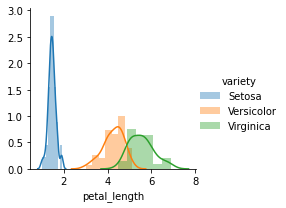

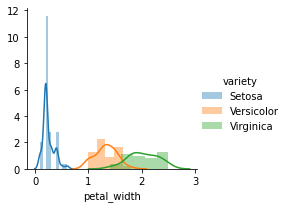

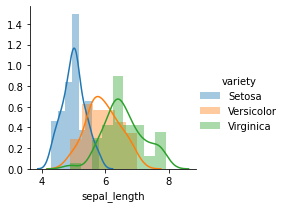

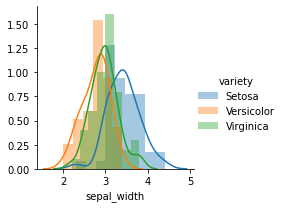

In [25]:
plt.figure(figsize=(20, 16), dpi=80)
sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="variety",size=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

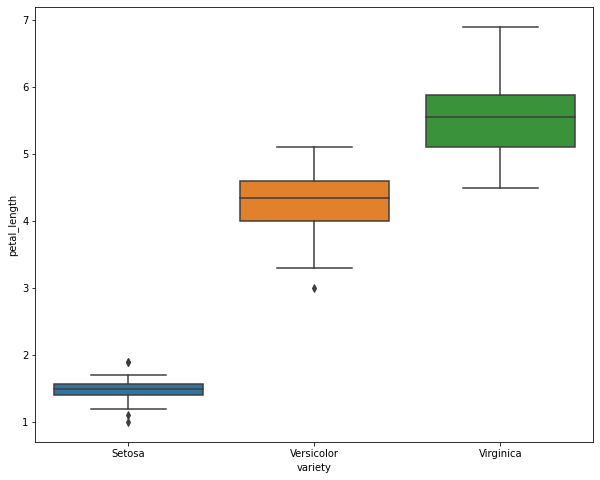

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="variety",y="petal_length",data=iris)
plt.show()

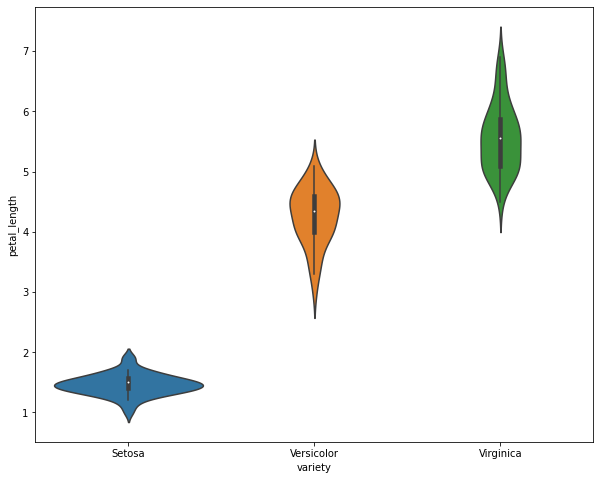

In [27]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="variety",y="petal_length",data=iris)
plt.show()

/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x936 with 0 Axes>

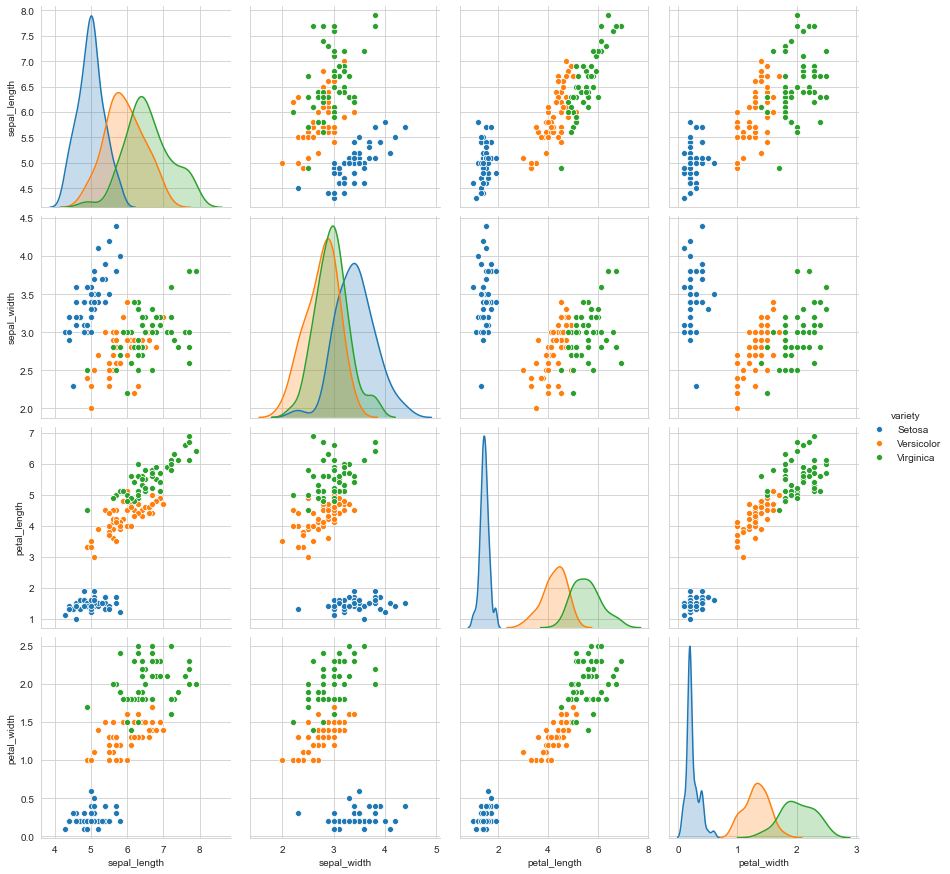

In [28]:
plt.figure(figsize=(15, 13))
sns.set_style("whitegrid")
sns.pairplot(iris, hue="variety", size=3);
plt.show()

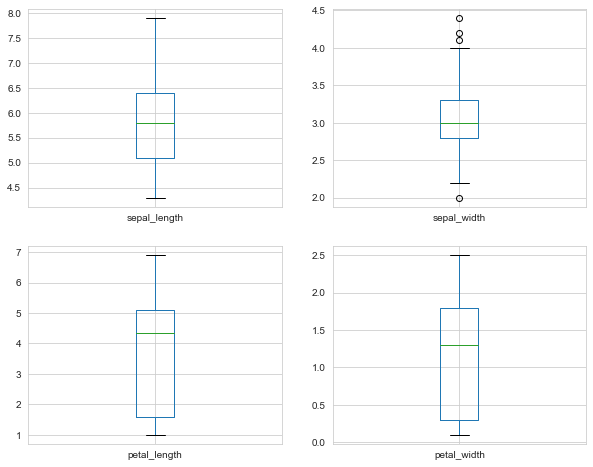

In [29]:
## Pandas tiene su propia libería para plotear
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10, 8))
plt.show()

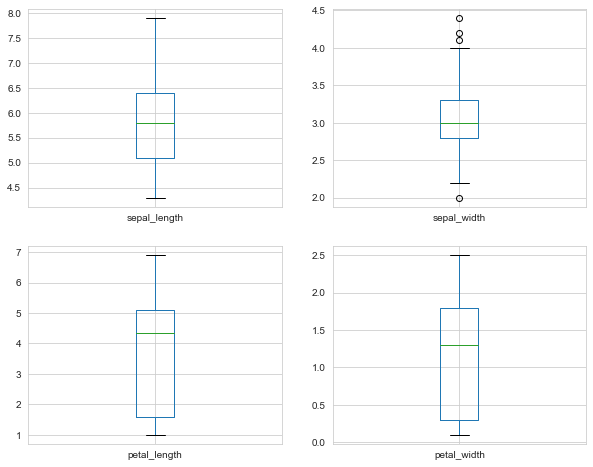

In [30]:
iris.plot.box(subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10, 8))
plt.show()

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

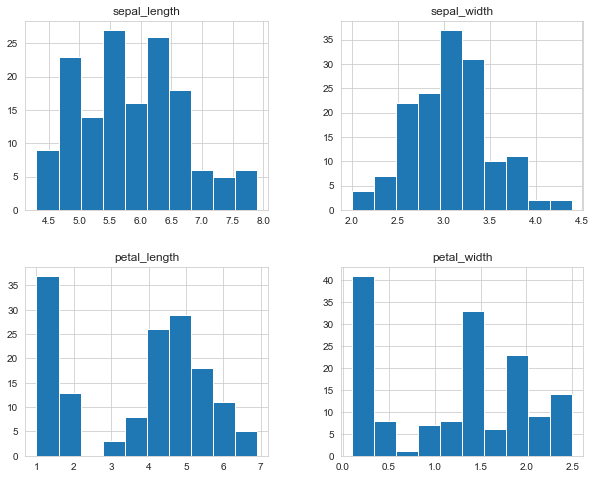

In [31]:
iris.hist(figsize=(10, 8))

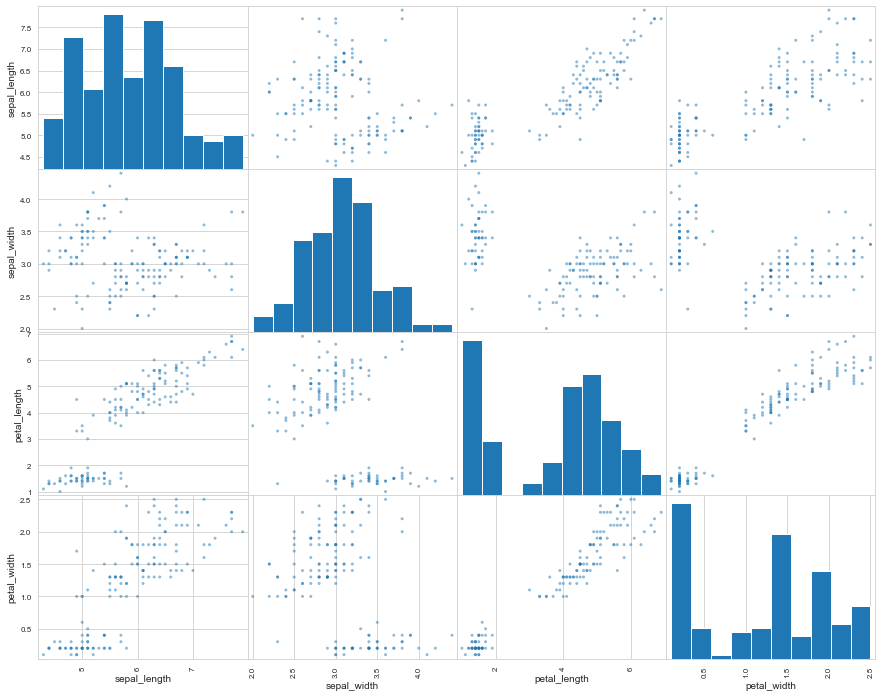

In [32]:
pdplt.scatter_matrix(iris[iris.columns[0:4]], figsize=(15, 12))
plt.show()

In [43]:
# Agrupandolos
por_tipo_media = iris.groupby('variety').mean()
print(por_tipo_media)

            sepal_length  sepal_width  petal_length  petal_width
variety                                                         
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026


In [45]:
por_tipo_corr = iris.groupby('variety').corr() # method{'pearson', 'kendall', 'spearman'} or callable
print(por_tipo_corr)

                         sepal_length  sepal_width  petal_length  petal_width
variety                                                                      
Setosa     sepal_length      1.000000     0.742547      0.267176     0.278098
           sepal_width       0.742547     1.000000      0.177700     0.232752
           petal_length      0.267176     0.177700      1.000000     0.331630
           petal_width       0.278098     0.232752      0.331630     1.000000
Versicolor sepal_length      1.000000     0.525911      0.754049     0.546461
           sepal_width       0.525911     1.000000      0.560522     0.663999
           petal_length      0.754049     0.560522      1.000000     0.786668
           petal_width       0.546461     0.663999      0.786668     1.000000
Virginica  sepal_length      1.000000     0.457228      0.864225     0.281108
           sepal_width       0.457228     1.000000      0.401045     0.537728
           petal_length      0.864225     0.401045      1.000000

/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


variety
Setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Virginica     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

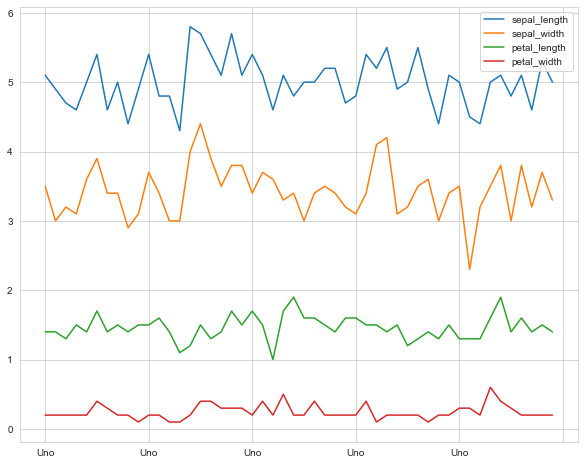

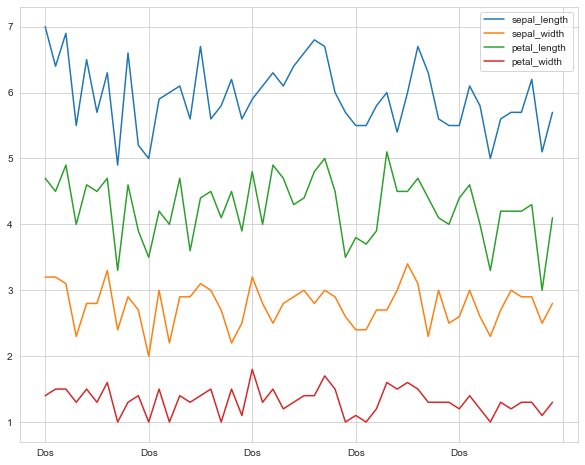

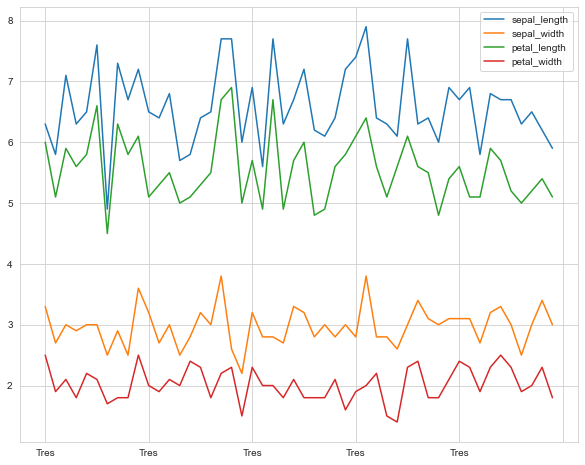

In [48]:
iris.groupby('variety').plot(figsize=(10, 8))

In [33]:
from statsmodels.formula.api import ols

In [35]:
model = ols('sepal_width ~ variety + petal_length', iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           5.14e-21
Time:                        11:52:55   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.99

In [52]:
# Guardar el módelo
with open('OLS-Iris.txt', 'w') as file_txt:
    file_txt.write(str(model.summary()))
    file_txt.close()

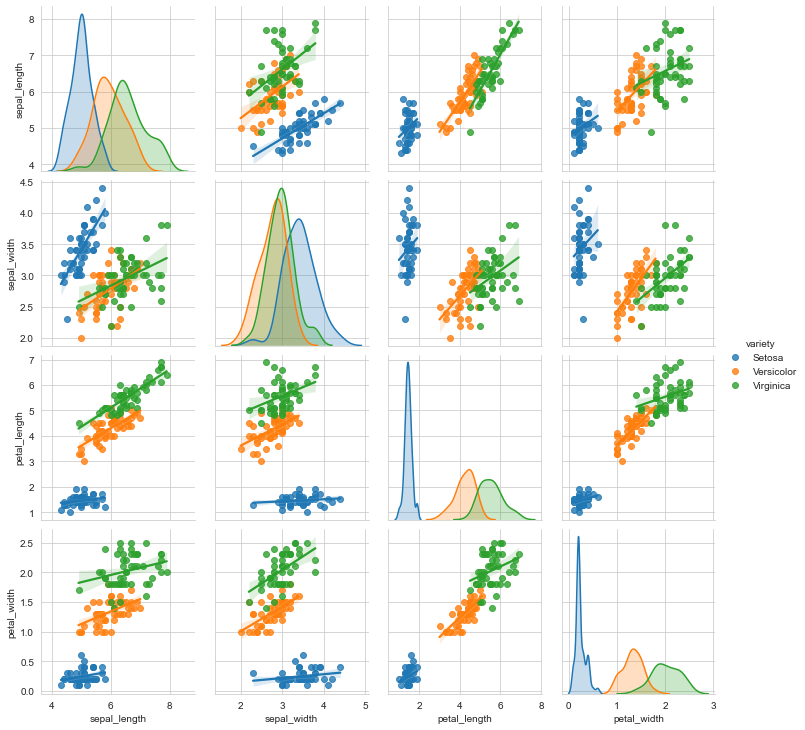

In [53]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], kind='reg', hue='variety') 

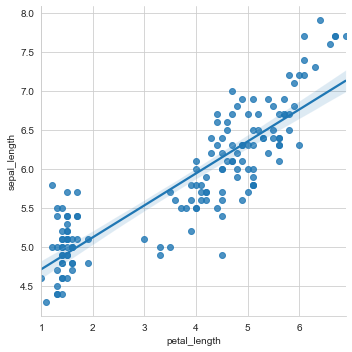

In [56]:
sns.lmplot(y='sepal_length', x='petal_length', data=iris)  

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

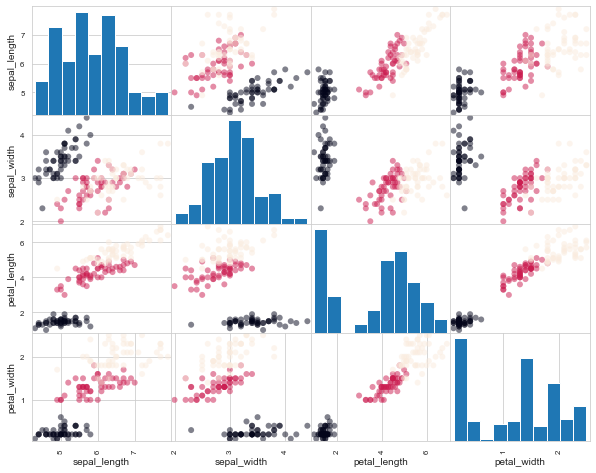

In [64]:
### COMO DEBERÍA DE SER

tipos = pd.Categorical(iris['variety'])

pdplt.scatter_matrix(iris, c=tipos.codes, marker='o', figsize=(10, 8))

In [66]:
model = ols('sepal_width ~ variety + petal_length', iris).fit()
print(model.summary())
print(' ')
print('Probando la diferencia entre el efecto de versicolor y virginica')
print(model.f_test([0, 1, -1, 0]))
plt.show()

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     46.08
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           5.14e-21
Time:                        12:24:08   Log-Likelihood:                -37.808
No. Observations:                 150   AIC:                             83.62
Df Residuals:                     146   BIC:                             95.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.99

In [ ]:
# Búsqueda de las Bases Reales
files_txt = gg('/Users/javier/Google Drive/Curso Python Pandas 2020/Scripts/*.txt')